In [26]:
import os
import numpy as np
import math
import scipy.constants as const
import matplotlib.pyplot as plt
import csv

In [25]:
# Reading input files.
file1 = open('/Users/bshumberger/Documents/test_space/automation_test_space/MD_scripts/Sorted.txt','r')

cmpd = []
GFE = []
VibFreq = []
RotStr = []

for line in file1.readlines():
    col = line.split()
    cmpd.append(int(col[0]))
    GFE.append(float(col[1]))
    VibFreq.append(float(col[2]))
    RotStr.append(float(col[3]))

file1.close()

file2 = open('/Users/bshumberger/Documents/test_space/automation_test_space/MD_scripts/Combined_Free_Energy.txt','r')

cmpd2 = []
GFE2 = []
                
for line in file2.readlines():
    col = line.split()
    cmpd2.append(int(col[0]))
    GFE2.append(float(col[1]))

file2.close()

# Multiplying the rotational strength for simple averaging.
Avg_RotStr = np.zeros((len(cmpd)))
for i in range(0,len(cmpd)):
    Avg_RotStr[i] += RotStr[i]*1/len(cmpd2)

# Calculating the differential molar extinction coefficient in equation 8d in "ECD Cotton Effects Approximated by the Gaussian Curve and Other Methods" by Philip J. Stephens and Nobuyuki Harada.
number_of_points = 2000
fwhm = .001

delta = float((max(VibFreq)-min(VibFreq))/number_of_points)
Incident_VibFreq = np.arange(min(VibFreq),max(VibFreq), delta)
diff_mol_ext_coeff = np.zeros((number_of_points))
Incident_VibFreq_cm1 = np.zeros((number_of_points))

for i in range(0,len(Incident_VibFreq)):
    for j in range(0,len(cmpd)):
        diff_mol_ext_coeff[i] += (1/((2.296*10**(-39))*math.sqrt(np.pi)*fwhm))*VibFreq[j]*Avg_RotStr[j]*np.exp(-((Incident_VibFreq[i]-VibFreq[j])/fwhm)**2)
    Incident_VibFreq_cm1[i] = Incident_VibFreq[i]*8065.54429 # Converting frequencies to cm-1

FileNotFoundError: [Errno 2] No such file or directory: '/Users/bshumberger/Documents/test_space/automation_test_space/MD_scripts/Sorted.txt'

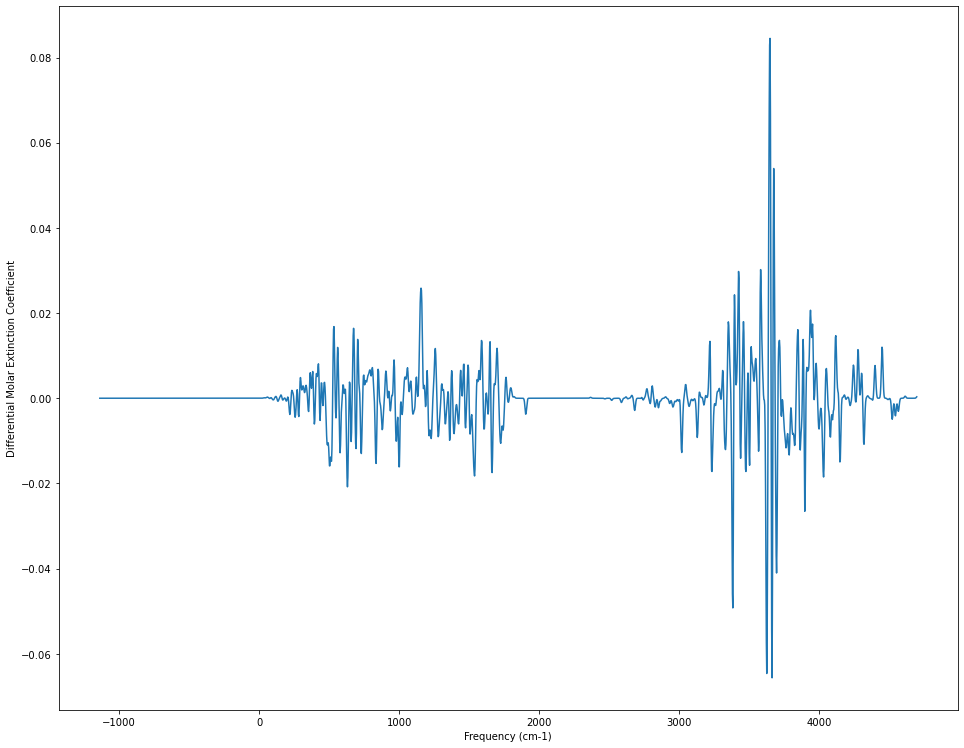

In [24]:
# Setting plot parameters.
plt.rcParams["figure.figsize"] = [13.50, 10.50]
plt.rcParams["figure.autolayout"] = True

# Selecting data to plot.
plt.plot(Incident_VibFreq_cm1, diff_mol_ext_coeff)

# Plotting the spectrum with x- and y- axis labels.
plt.xlabel('Frequency (cm-1)')
plt.ylabel('Differential Molar Extinction Coefficient')

# Setting the limits on the x-axis.
#plt.xlim(1000,2000)

# Saving the plot.
#plt.savefig('/Users/bshumberger/Documents/Data/A_methylglucoside/Spectrum.pdf', bbox_inches='tight')

# Displaying plot.
plt.show()


In [ ]:
# Saves the data as to a .txt file.
#data = np.stack([Incident_VibFreq_cm1, diff_mol_ext_coeff], axis=1)
#np.savetxt("/Users/bshumberger/Documents/Data/A_methylglucoside/Spectral_data.txt", data, delimiter="\t")